In [1]:
# Libraries for Data Manupulation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Libraries for Image Preprocessing
import cv2
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator,load_img

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

print('All libraries are imported Successfully :)')

All libraries are imported Successfully :)


In [2]:
new_model = tf.keras.models.load_model(r"C:\Pravin\Almabetter\Capstone Projects\5.DL - CNN Capstone\Vinnet.h5")

In [3]:
faceCascade = cv2.CascadeClassifier(r"C:\Pravin\Almabetter\Capstone Projects\5.DL - CNN Capstone\Final_Project\Src\haarcascade_frontalface_default.xml")

In [4]:
frame = cv2.imread(r"C:\Pravin\Almabetter\Capstone Projects\5.DL - CNN Capstone\Final_Project\Src\6.happy.jpg")

In [5]:
frame.shape

(1280, 576, 3)

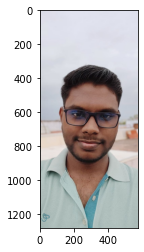

In [6]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [8]:
gray.shape

(1280, 576)

In [9]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
  faces = faceCascade.detectMultiScale(roi_gray)
  if len(faces) == 0:
    print("Face not detected")
  else:
    for (ex,ey,ew,eh) in faces:
      face_roi = roi_color[ey:ey+eh, ex:ex+ew]

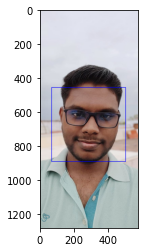

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

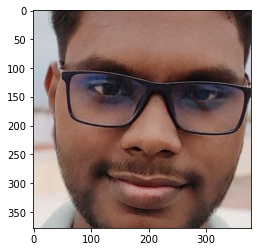

In [11]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [12]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [13]:
predictions = new_model.predict(final_image)

In [14]:
predictions[0]

array([5.4817637e-03, 5.0313974e-05, 4.2317775e-03, 4.9684855e-01,
       4.8375499e-01, 6.7976653e-03, 2.8349762e-03], dtype=float32)

In [15]:
np.argmax(predictions)

3

In [17]:
path = r"C:\Pravin\Almabetter\Capstone Projects\5.DL - CNN Capstone\Final_Project\Src\haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_DUPLEX

cap = cv2.VideoCapture(0)

while True:
  ret, frame = cap.read()
  faceCascade = cv2.CascadeClassifier(path)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray, 1.1,4)
  for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    faces = faceCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in faces:
      face_roi = roi_color[ey:ey+eh, ex:ex+ew]
      
  final_image = cv2.resize(face_roi, (224,224))
  final_image = np.expand_dims(final_image, axis = 0)
  final_image = final_image/255.0
  Predictions = new_model.predict(final_image)
  
  if (np.argmax(Predictions) == 0):
    status = "Angry"
    x1,y1,w1,h1 = 0,0,175,75
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
  elif (np.argmax(Predictions) == 1):
    status = "Disgust"
    x1,y1,w1,h1 = 0,0,175,75
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
  elif (np.argmax(Predictions) == 2):
    status = "Fear"
    x1,y1,w1,h1 = 0,0,175,75
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
  elif (np.argmax(Predictions) == 3):
    status = "Happy"
    x1,y1,w1,h1 = 0,0,175,75
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
  elif (np.argmax(Predictions) == 5):
    status = "Sad"
    x1,y1,w1,h1 = 0,0,175,75
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
  elif (np.argmax(Predictions) == 6):
    status = "Surprise"
    x1,y1,w1,h1 = 0,0,175,75
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
  else:
    status = "Neutral"
    x1,y1,w1,h1 = 0,0,175,75
    cv2.putText(frame, status, (100, 150), font, 3, (255,0,0),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0))

  cv2.imshow('Face Emotion Recognition', frame)
  if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

print("Face and Emotion are captured Successfully")

Face and Emotion are captured Successfully
